                                                           Zillow Group
                                                   

La industria inmobiliaria desempeña un papel fundamental en las economías de los países porque permiten el desarrollo social y urbano, generando una fuente importante de empleos donde se realizan procesos de contratación del personal capacitado como lo son ingenieros, arquitectos, maestros, diseñadores, entre otros. Igualmente, la venta de casas genera inversión y gran flujo de dinero, activándose  un sector importante de la economía  que posibilita adquirir bienes y  acumular riqueza. Además, las viviendas son una necesidad básica porque las personas necesitan un refugio para resguardarse, sentir seguridad y es el lugar de asentamiento de las familias. Asimismo, según datos de Fernández (2022), en Estados Unidos para el 2020 se compraron 820.000 viviendas, es decir se generó un aumento del 16% con respecto a las ventas del año 2019 que fueron de 683.000. Por lo mencionado anteriormente, la empresa Zillow Group, según Gutiérrez (2021), se dedica a ofrecer información sobre bienes raíces residenciales, los cuales estén a la venta en el condado Iowa, ciudad de Ames ofreciendo diferentes datos de mercado y herramientas para que los compradores y vendedores en el sector inmobiliario tomen decisiones apropiadas. Es por esto, que la empresa quiere hacer un modelo de regresión lineal múltiple que le permita predecir el precio de viviendas en esa ciudad a partir de una base de datos de hitóricos de ventas donde se encuntran variables como lo son el tamaño del lote, tamaño de la casa, cantidad de baños, entre otras.  

                                     Caso 2
                               

Para el desarrollo del caso 2 utilizamos la misma base de datos final modificada del "Caso 1" donde tenemos la creación de variables Dummies para poder trabajar las extensiones de la regresión lineal y los métodos de re-muestreo desde dicho avance.

In [1]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
print (df.head())

   MSSubClass MSZoning  LotArea LotConfig Neighborhood  YearBuilt  \
0          60       RL     8450    Inside      CollgCr       2003   
1          20       RL     9600       FR2      Veenker       1976   
2          60       RL    11250    Inside      CollgCr       2001   
3          70       RL     9550    Corner      Crawfor       1915   
4          60       RL    14260       FR2      NoRidge       2000   

   TotalBsmtSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0          856       1710         2             1             8         548   
1         1262       1262         2             1             6         460   
2          920       1786         2             1             6         608   
3          756       1717         1             1             7         642   
4         1145       2198         2             1             9         836   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     1400

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   LotConfig     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   YearBuilt     1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   KitchenAbvGr  1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
 11  GarageArea    1460 non-null   int64 
 12  YrSold        1460 non-null   int64 
 13  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 159.8+ KB


                                     Caso 2
                               

Para el desarrollo del caso 2 utilizamos la misma base de datos final modificada del "Caso 1" donde tenemos la creación de variables Dummies para poder trabajar las extensiones de la regresión lineal y los métodos de re-muestreo desde dicho avance.

In [3]:
df= pd.get_dummies(df,drop_first=True)
#Pasamos los datos boolenaos de True/Flase a 1/0.
df = df.astype(int)

                         Extensiones de la regresión lieal

Tenemos en cuenta que el mejor modelo encontrado en el caso 1 es con un R^2 de 0.801.

                                Implementación del uso
                                   de interacciones

In [4]:
# Crear un nuevo DataFrame para almacenar las divisiones en pares
nuevo_df = pd.DataFrame()

# Obtener la lista de columnas excepto "SalePrice"
columnas = df.columns[df.columns != "SalePrice"]

# Iterar a través de las columnas en pares y realizar la división
for i in range(0, len(columnas), 2):
    par_de_columnas = columnas[i:i+2]
    if len(par_de_columnas) == 2:  # Verificar si hay un par completo
        nuevo_nombre_columna = f"{par_de_columnas[0]}_{par_de_columnas[1]}"
        nuevo_df[nuevo_nombre_columna] = df[par_de_columnas[0]] / df[par_de_columnas[1]]

# Mostrar el nuevo DataFrame con las columnas divididas en pares
nuevo_df.info()
nuevo_df=nuevo_df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MSSubClass_LotArea                         1460 non-null   float64
 1   YearBuilt_TotalBsmtSF                      1460 non-null   float64
 2   GrLivArea_FullBath                         1460 non-null   float64
 3   KitchenAbvGr_TotRmsAbvGrd                  1460 non-null   float64
 4   GarageArea_YrSold                          1460 non-null   float64
 5   MSZoning_FV_MSZoning_RH                    81 non-null     float64
 6   MSZoning_RL_MSZoning_RM                    1369 non-null   float64
 7   LotConfig_CulDSac_LotConfig_FR2            141 non-null    float64
 8   LotConfig_FR3_LotConfig_Inside             1056 non-null   float64
 9   Neighborhood_Blueste_Neighborhood_BrDale   18 non-null     float64
 10  Neighborhood_BrkSide_Nei

Completamos los valores faltantes del data frame con "0", esto aplica a las variables dummies que son las unicas que presentan dichos valores.

In [5]:
df=pd.concat([df,nuevo_df], axis=1)
df= df.loc[:, ~df.columns.duplicated()]
df.replace([np.inf, -np.inf], 999, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MSSubClass                                 1460 non-null   int32  
 1   LotArea                                    1460 non-null   int32  
 2   YearBuilt                                  1460 non-null   int32  
 3   TotalBsmtSF                                1460 non-null   int32  
 4   GrLivArea                                  1460 non-null   int32  
 5   FullBath                                   1460 non-null   int32  
 6   KitchenAbvGr                               1460 non-null   int32  
 7   TotRmsAbvGrd                               1460 non-null   int32  
 8   GarageArea                                 1460 non-null   int32  
 9   YrSold                                     1460 non-null   int32  
 10  SalePrice               

Ahora tenemos un nuevo data frame con 64 variables, conformado la mitad con nuestra base de datos del "Caso 1" y la otra parte con la multiplicación entre columnas de a parejas sin tener en cuenta nuestra variable depentiente "SalePrice"

                Regresión lineal multiple con Interacciones

In [6]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["SalePrice"],axis=1)
X_multi.head()
y_multi = df["SalePrice"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:38:06   Log-Likelihood:                -17346.
No. Observations:                1460   AIC:                         3.479e+04
Df Residuals:                    1412   BIC:                         3.504e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                     -3.133e+06   3.65e+06     -0.859      0.391   -1.03e+07    4.03e+06
MSSubClass                                  -42.5741     43.897     -0.970      0.332    -128.685      43.537
LotArea                                       0.3539      0.111      3.175      0.002       0.135       0.573
YearBuilt                                   480.3889     73.359      6.549      0.000     336.486     624.292
TotalBsmtSF                                  23.9107      3.521      6.791      0.000      17.004      30.817
GrLivArea                                    60.8929      7.180      8.481      0.000      46.808      74.977
FullBath                                  -1382.1425   6263.712     -0.221      0.825   -1.37e+04    1.09e+04
KitchenAbvGr                              -7.368e+04   1.04e+04     -7.107      0.000    -9.4e+04   -5.33e+04
TotRmsAbvGrd                               1.006e+04   2152.521      4.674      0.000    5838.360    1.43e+04
GarageArea                                -2608.5189   7090.214     -0.368      0.713   -1.65e+04    1.13e+04
YrSold                                     1085.5446   1809.651      0.600      0.549   -2464.349    4635.438
MSZoning_FV                                   0.0374      0.017      2.257      0.024       0.005       0.070
MSZoning_RH                                3.651e+04   1.66e+04      2.196      0.028    3901.804    6.91e+04
MSZoning_RL                                   0.0398      0.014      2.901      0.004       0.013       0.067
MSZoning_RM                                4.149e+04   1.28e+04      3.241      0.001    1.64e+04    6.66e+04
LotConfig_CulDSac                             0.0129      0.004      2.891      0.004       0.004       0.022
LotConfig_FR2                             -6268.4122   5803.445     -1.080      0.280   -1.77e+04    5115.889
LotConfig_FR3                                -0.0168      0.018     -0.919      0.358      -0.053       0.019
LotConfig_Inside                            566.6501   2502.620      0.226      0.821   -4342.604    5475.904
Neighborhood_Blueste                          0.0117      0.029      0.409      0.682      -0.044       0.068
Neighborhood_BrDale                       -1020.8187   1.52e+04     -0.067      0.947   -3.09e+04    2.89e+04
Neighborhood_BrkSide                         -0.0156      0.012     -1.288      0.198      -0.039       0.008
Neighborhood_ClearCr                      -1.109e+04    1.2e+04     -0.927      0.354   -3.45e+04    1.24e+04
Neighborhood_CollgCr                         -0.0150      0.010     -1.529      0.127      -0.034       0.004
Neighborhood_Crawfor                       1.896e+04   1.14e+04      1.666      0.096   -3369.083    4.13e+04
Nei

A) ¿Es mejor el mejor modelo encontrado en el caso 1 o haciendo   uso                 de las interacciones?

RTA: El R^2 cambia de 0.801 a 0.806 en el modelo de interacciones, pero en pocas palabras el modelo sigue teniendo la misma precisión con los dos métodos, por ende hasta el momento cualquiera de los 2 modelos es el mejor.

                            Implementación del uso
                            de efectos cuadráticos

In [7]:
df = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
df= pd.get_dummies(df,drop_first=True)
df = df.astype(int)
df_2 = df.drop(columns=["SalePrice"])
# Obtener el número de columnas
num_columnas = df_2.shape[1]

# Crear un nuevo DataFrame para almacenar los resultados
df_resultado = pd.DataFrame()

# Exponente inicial
exponente = 2

# Iterar a través de las columnas y elevar al exponente correspondiente
for i in range(num_columnas):
    columna = df_2.iloc[:, i]
    columna_elevada = columna.pow(exponente)
    nombre_columna_original = df_2.columns[i]
    nombre_columna_resultado = f'{nombre_columna_original}^{exponente}'
    df_resultado[nombre_columna_resultado] = columna_elevada
    exponente += 1

In [8]:
df=pd.concat([df,df_resultado], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MSSubClass               1460 non-null   int32
 1   LotArea                  1460 non-null   int32
 2   YearBuilt                1460 non-null   int32
 3   TotalBsmtSF              1460 non-null   int32
 4   GrLivArea                1460 non-null   int32
 5   FullBath                 1460 non-null   int32
 6   KitchenAbvGr             1460 non-null   int32
 7   TotRmsAbvGrd             1460 non-null   int32
 8   GarageArea               1460 non-null   int32
 9   YrSold                   1460 non-null   int32
 10  SalePrice                1460 non-null   int32
 11  MSZoning_FV              1460 non-null   int32
 12  MSZoning_RH              1460 non-null   int32
 13  MSZoning_RL              1460 non-null   int32
 14  MSZoning_RM              1460 non-null   int32
 15  LotC

Creamos un nuevo data frame con 85 variables, que se compone a la base de datos original más 42 variables elevadas al numero entero mayor del exponente de la variable anterior, emepzando con X1^2 (MSSubClass) hasta X42^43 (Neighborhood_Veenker).

               Regresión lineal multiple con Efectos Cuadráticos

In [9]:
X_multi=df.drop(columns=["SalePrice"],axis=1)
X_multi.head()
y_multi = df["SalePrice"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     115.1
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:38:06   Log-Likelihood:                -17333.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1407   BIC:                         3.505e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.526e+06   2.52e+06     -1.002      0.317   -7.47e+06    2.42e+06
MSSubClass               -265.1253     90.616     -2.926      0.003    -442.882     -87.369
LotArea                     0.4133      0.109      3.777      0.000       0.199       0.628
YearBuilt                 519.6758     71.980      7.220      0.000     378.477     660.875
TotalBsmtSF                21.3463      3.148      6.781      0.000      15.171      27.522
GrLivArea                  57.0634      4.379     13.031      0.000      48.473      65.654
FullBath                -6610.3314   3003.430     -2.201      0.028   -1.25e+04    -718.648
KitchenAbvGr            -3.425e+04   5846.413     -5.859      0.000   -4.57e+04   -2.28e+04
TotRmsAbvGrd             2550.8329   1156.052      2.207      0.028     283.061    4818.605
GarageArea                 40.4471      5.991      6.752      0.000      28.696      52.198
YrSold                    773.3880   1250.659      0.618      0.536   -1679.969    3226.745
MSZoning_FV              1.584e+04   8186.690      1.935      0.053    -221.067    3.19e+04
MSZoning_RH              1.826e+04   8263.235      2.210      0.027    2049.843    3.45e+04
MSZoning_RL              2.031e+04   6796.202      2.989      0.003    6981.137    3.36e+04
MSZoning_RM              2.051e+04   6358.166      3.226      0.001    8035.818     3.3e+04
LotConfig_CulDSac        5943.7745   2216.083      2.682      0.007    1596.593    1.03e+04
LotConfig_FR2           -2924.1324   2884.129     -1.014      0.311   -8581.788    2733.523
LotConfig_FR3           -7658.6457   9069.175     -0.844      0.399   -2.54e+04    1.01e+04
LotConfig_Inside          462.5527   1242.522      0.372      0.710   -1974.842    2899.947
Neighborhood_Blueste    -1.261e+04   1.36e+04     -0.927      0.354   -3.93e+04    1.41e+04
Neighborhood_BrDale      -1.67e+04   6950.753     -2.402      0.016   -3.03e+04   -3060.864
Neighborhood_BrkSide    -4562.5998   5870.157     -0.777      0.437   -1.61e+04    6952.602
Neighborhood_ClearCr    -3597.7829   5876.391     -0.612      0.540   -1.51e+04    7929.649
Neighborhood_CollgCr    -4264.4653   4749.660     -0.898      0.369   -1.36e+04    5052.712
Neighborhood_Crawfor     1.167e+04   5566.905      2.097      0.036     753.480    2.26e+04
Neighborhood_Edwards    -1.674e+04   5121.375     -3.269      0.001   -2.68e+04   -6696.033
Neighborhood_Gilbert    -6174.9282   4974.040     -1.241      0.215   -1.59e+04    3582.405
Neighborhood_IDOTRR     -9943.3305   6767.771     -1.469      0.142   -2.32e+04    3332.678
Neighborhood_MeadowV    -1.593e+04   6851.574     -2.325      0.020   -2.94e+04   -2490.881
Neighborhood_Mitchel    -1.143e+04   5246.512     -2.178      0.030   -2.17e+04   -1133.414
Neighborhood_NAmes      -1.173e+04   4957.673  

B) ¿Es mejor el mejor modelo encontrado en el caso 1 o haciendo   uso                 de efectos cuadráticos?

RTA: El R^2 cambia de 0.801 a 0.810 en el modelo de efectos cuadráticos, demostrando (asi sea poco) que es mejor modelo que en el caso 1.

    
                                  Bootstrap                             

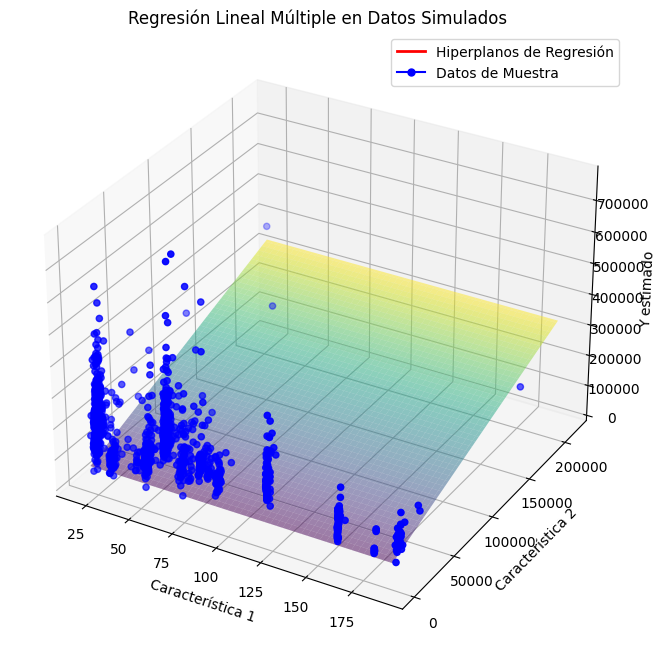

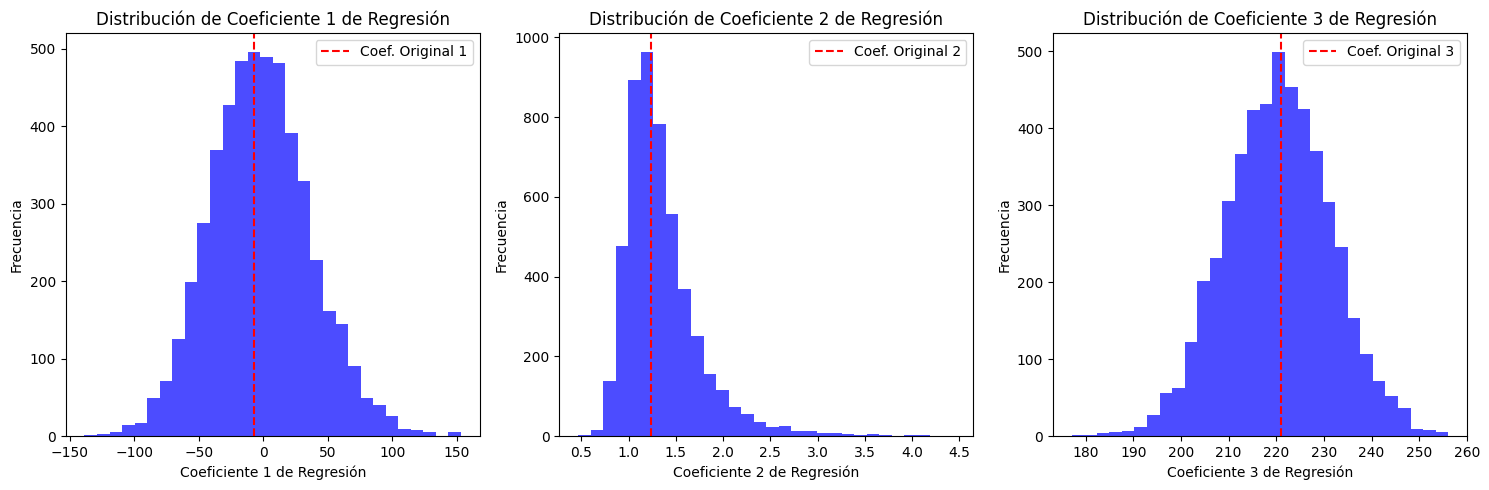

Resultados de los coeficientes Bootstrap:
Coeficiente 1: Media = -1.9916, Desviación Estándar = 38.9851
Coeficiente 2: Media = 1.3536, Desviación Estándar = 0.4046
Coeficiente 3: Media = 220.3840, Desviación Estándar = 11.0403


In [10]:

data = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
# Ajustar un modelo de regresión lineal múltiple a los datos originales
model = LinearRegression()
X_multiple = data[['MSSubClass', 'LotArea', 'GarageArea']]  # Características
y = data['SalePrice']  # Objetivo
model.fit(X_multiple, y)
coef_originales = model.coef_
intercept_original = model.intercept_

# Visualizar los datos originales y los hiperplanos de regresión de cada característica en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['MSSubClass'], data['LotArea'], data['SalePrice'], c='blue', label='Datos de Muestra')

# Calcular los hiperplanos de regresión para cada característica
x1_grid = np.linspace(data['MSSubClass'].min(), data['MSSubClass'].max(), 100)
x2_grid = np.linspace(data['LotArea'].min(), data['LotArea'].max(), 100)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)

# Calcular los valores de Z (objetivo estimado) para la superficie de regresión
Z_grid = intercept_original + coef_originales[0] * X1_grid + coef_originales[1] * X2_grid

# Graficar los hiperplanos de regresión
ax.plot_surface(X1_grid, X2_grid, Z_grid, cmap='viridis', alpha=0.5)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Y estimado')
ax.set_title('Regresión Lineal Múltiple en Datos Simulados')

# Crear una leyenda manualmente
ax.legend(handles=[plt.Line2D([0], [0], color='red', lw=2, label='Hiperplanos de Regresión'),
                   plt.Line2D([0], [0], marker='o', color='blue', label='Datos de Muestra', markersize=5)],
          loc='best')

plt.show()

# Aplicar Bootstrap para estimar los coeficientes de regresión múltiple
num_bootstrap_samples = 5000  # Número de muestras Bootstrap
bootstrap_coefs = []
bootstrap_intercept = []

for _ in range(num_bootstrap_samples):
    # Generar una muestra bootstrap
    bootstrap_data = data.sample(frac=1, replace=True)  # Mezclar y tomar muestras con reemplazo
    X_bootstrap = bootstrap_data[['MSSubClass', 'LotArea', 'GarageArea']]
    y_bootstrap = bootstrap_data['SalePrice']

    # Ajustar un modelo de regresión lineal múltiple a la muestra bootstrap
    model.fit(X_bootstrap, y_bootstrap)
    bootstrap_coefs.append(model.coef_)
    bootstrap_intercept.append(model.intercept_)

# Visualizar las distribuciones de los coeficientes de regresión múltiple
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    plt.hist(bootstrap_coefs_i, bins=30, color='blue', alpha=0.7)
    plt.axvline(x=coef_originales[i], color='red', linestyle='--', label=f'Coef. Original {i + 1}')
    plt.xlabel(f'Coeficiente {i + 1} de Regresión')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de Coeficiente {i + 1} de Regresión')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados de los coeficientes Bootstrap
print("Resultados de los coeficientes Bootstrap:")
for i, coef_name in enumerate(['Coeficiente 1', 'Coeficiente 2', 'Coeficiente 3']):
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    mean_coef_bootstrap = np.mean(bootstrap_coefs_i)
    std_coef_bootstrap = np.std(bootstrap_coefs_i)
    print(f"{coef_name}: Media = {mean_coef_bootstrap:.4f}, Desviación Estándar = {std_coef_bootstrap:.4f}")

                             Referencias
                                

Fernandez, R. (20 de Septiembre de 2022). Statista. Obtenido de https://es.statista.com/estadisticas/634572/numero-de-viviendas-vendidas-en-estados-unidos-1995/


Gutierrez, I. (5 de Agosto de 2021). Muy financiero. Obtenido de https://muyfinanciero.com/empresas/zillow/


Habitad Mexico. (S.f). Obtenido de https://www.habitatmexico.org/vivienda-derecho#:~:text=La%20vivienda%20adecuada%20es%20una,individuales%2C%20sino%20de%20n%C3%BAcleos%20familiares

